In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/WineQT.csv")

In [4]:
X = data.drop(columns=["quality", "Id"])
y = data["quality"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [11]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [12]:
y_pred = svm_model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.597667638483965

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.64      0.79      0.71       143
           6       0.55      0.63      0.59       146
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00         4

    accuracy                           0.60       343
   macro avg       0.24      0.28      0.26       343
weighted avg       0.50      0.60      0.55       343


Confusion Matrix:
 [[  0   6   3   0   0]
 [  0 113  30   0   0]
 [  0  54  92   0   0]
 [  0   4  37   0   0]
 [  0   0   4   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
X_train_2d, X_test_2d = X_train.iloc[:, :2], X_test.iloc[:, :2]
svm_model_2d = SVC(kernel='linear', C=1.0, random_state=42)
svm_model_2d.fit(X_train_2d, y_train)

SVC(kernel='linear', random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


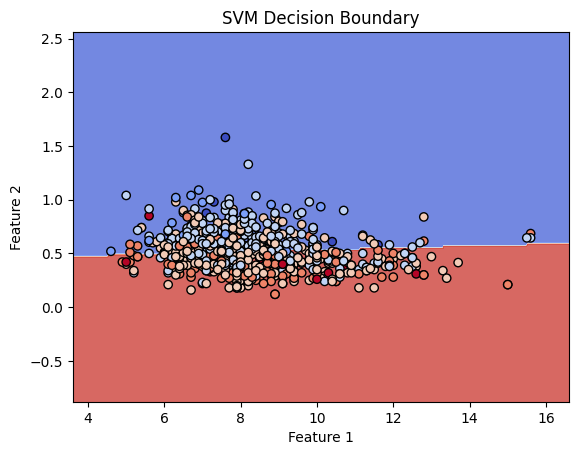

In [17]:
def plot_decision_boundaries(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundaries(X_train_2d, y_train, svm_model_2d)